<a href="https://colab.research.google.com/github/aisyaptrs/a/blob/main/PRAKTIKUM_NN_with_Hold_Out_dan_K_Fold_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Neural Network untuk Classification**

##NN untuk Klasifikasi bunga Iris menggunakan Hold Out Validation

**Memuat dataset Iris**

Dataset Iris adalah dataset klasik yang digunakan untuk masalah klasifikasi. Dataset ini terdiri dari 150 sampel dengan 4 fitur: panjang sepal, lebar sepal, panjang petal, dan lebar petal. Targetnya adalah 3 kelas: setosa, versicolor, dan virginica.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Memuat dataset Iris
iris = load_iris()
X = iris.data  # Fitur
y = iris.target  # Label

**Preprocessing Data**

Sebelum membangun model, kita perlu melakukan encoding pada label dan normalisasi pada fitur agar model lebih mudah dikonvergensi.

* One-hot encoding pada label: Karena kita memiliki 3 kelas (setosa, versicolor, virginica), kita perlu mengubah label menjadi format one-hot encoding.

* Normalisasi fitur: Fitur perlu dinormalisasi agar berada dalam rentang [0, 1] dan untuk menyamakan variasinya.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# One-hot encoding untuk label
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

**Membagi Data Menjadi Training dan Testing Set**

Agar model dapat dievaluasi, kita bagi dataset menjadi 80% data training dan 20% data testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Membangun Model Neural Network**

Kita akan menggunakan Keras Sequential API untuk membangun model neural network dengan:

1 hidden layer (16 neuron, aktivasi relu).
Output layer (3 neuron, aktivasi softmax untuk klasifikasi multi-kelas).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Membangun model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 kelas pada output


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Kompilasi Model**

Kita perlu mengkompilasi model dengan:

* Loss function: categorical_crossentropy (karena kita menggunakan one-hot encoding).
* Optimizer: adam.
* Metrik evaluasi: accuracy.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Melatih Model**

Kita latih model menggunakan data training dengan beberapa epoch dan batch size yang sesuai. Kita juga akan menggunakan validation split untuk memantau kinerja model selama pelatihan.

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4800 - loss: 1.0806 - val_accuracy: 0.5000 - val_loss: 1.0812
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6400 - loss: 1.0677 - val_accuracy: 0.8333 - val_loss: 1.0588
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7277 - loss: 1.0506 - val_accuracy: 0.7083 - val_loss: 1.0267
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6074 - loss: 1.0326 - val_accuracy: 0.7083 - val_loss: 0.9957
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6655 - loss: 1.0142 - val_accuracy: 0.7083 - val_loss: 0.9628
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6595 - loss: 0.9843 - val_accuracy: 0.7083 - val_loss: 0.9272
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6065 - loss: 0.9653 - val_accuracy: 0.7083 - val_loss: 0.8992
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6482 - loss: 0.9435 - val_accuracy: 0.7083 - val_loss

**Evaluasi Model**

Setelah pelatihan selesai, kita evaluasi model menggunakan data testing.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Akurasi pada data testing: {accuracy:.2f}')

Akurasi pada data testing: 0.93


**Membuat Prediksi**

Kita dapat menggunakan model untuk melakukan prediksi pada data testing.

In [ ]:
import numpy as np

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Menampilkan hasil prediksi
print(f'Prediksi: {predicted_classes}')
print(f'Kelas Asli: {true_classes}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediksi: [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 1 2 2 2 0 0]
Kelas Asli: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


**Visualisasi Hasil Pelatihan**

Kita bisa membuat grafik untuk memvisualisasikan akurasi dan loss selama proses pelatihan.

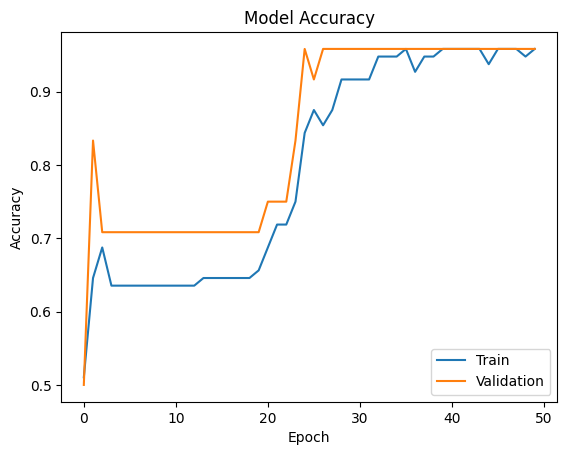

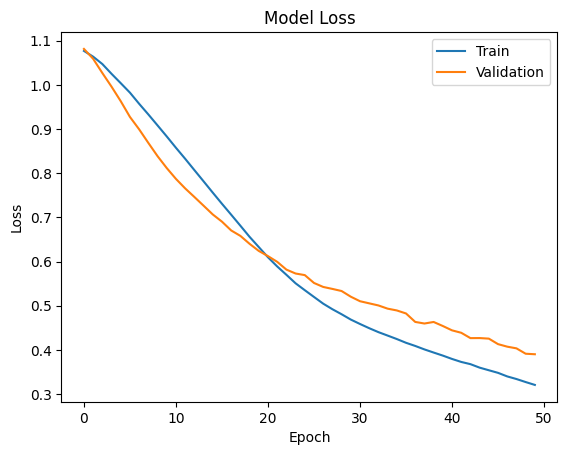

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Visualisasi loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


**Analisis Confusion Matrix**

Untuk melihat performa model lebih lanjut, kita bisa menggunakan confusion matrix.

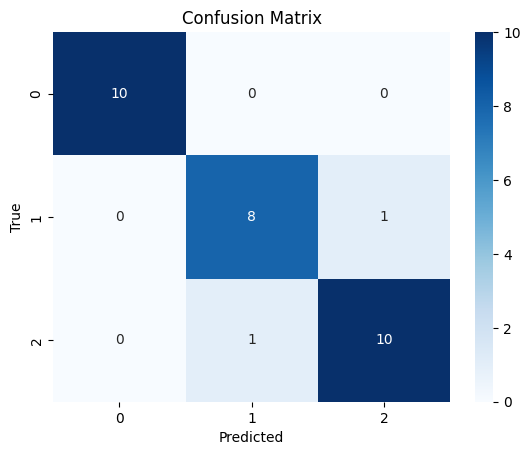

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Menampilkan laporan klasifikasi
print(classification_report(true_classes, predicted_classes, target_names=iris.target_names))


##NN untuk Klasifikasi Bunga Iris menggunakan K-fold Validation

Pada praktikum dibawah diulangi lagi memanggil data iris dan membangun model NN namun tanpa pembagian 80:20 diawal data. Pembagian training testing dilakukan berdasarkan indeks training dan testing.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset Iris
iris = load_iris()
X = iris.data  # Fitur
y = iris.target  # Label

# One-hot encoding untuk label
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


def build_model(input_shape):
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # 3 kelas untuk klasifikasi
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


**Implementasi Stratified K-Fold Cross-Validation**

Kita akan menggunakan Stratified K-Fold dengan n_splits=5 untuk membagi dataset menjadi 5 bagian.

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
fold_no = 1

for train_index, test_index in kfold.split(X_scaled, y):
    print(f"\nFold {fold_no}")

    # Membagi data menjadi training dan testing set berdasarkan indeks
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Membangun dan melatih model
    model = build_model(input_shape=X_train.shape[1])
    history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

    # Evaluasi model pada data testing
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    # Menghitung akurasi dan menyimpan hasilnya
    accuracy = accuracy_score(true_classes, predicted_classes)
    accuracies.append(accuracy)

    # Menampilkan hasil fold
    print(f"Akurasi pada fold {fold_no}: {accuracy:.2f}")
    fold_no += 1

# Menampilkan hasil akhir cross-validation
print("\nHasil Cross-Validation:")
print(f"Akurasi rata-rata: {np.mean(accuracies):.2f}")
print(f"Standar deviasi akurasi: {np.std(accuracies):.2f}")



Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Akurasi pada fold 1: 0.97

Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Akurasi pada fold 2: 0.90

Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Akurasi pada fold 3: 0.87

Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Akurasi pada fold 4: 0.97

Fold 5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Akurasi pada fold 5: 0.97

Hasil Cross-Validation:
Akurasi rata-rata: 0.93
Standar deviasi akurasi: 0.04


**Visualisasi Hasil Cross-Validation**

Jika Anda ingin melihat hasil pelatihan (akurasi dan loss) pada salah satu fold, kita bisa menambahkan visualisasi seperti berikut:

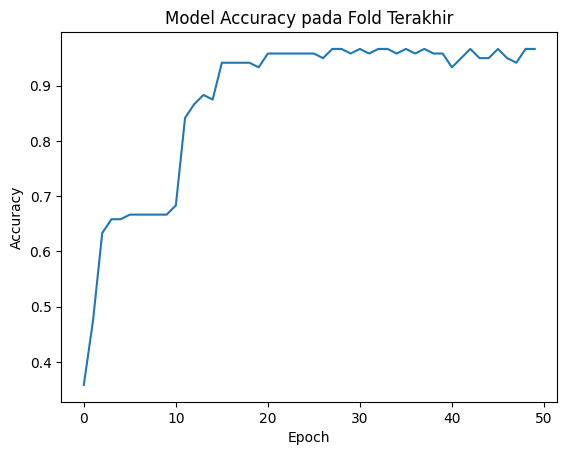

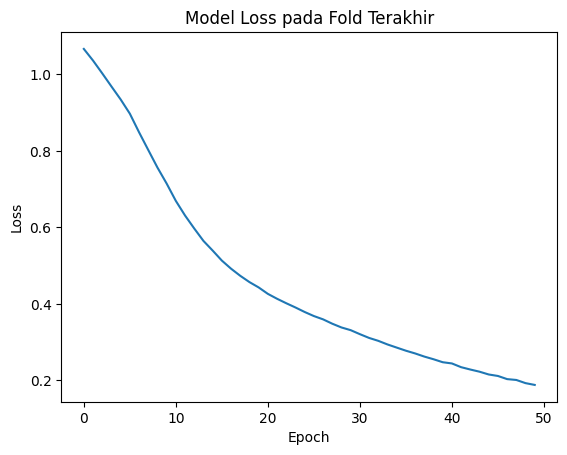

In [ ]:
# Visualisasi akurasi pada fold terakhir
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy pada Fold Terakhir')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Visualisasi loss pada fold terakhir
plt.plot(history.history['loss'])
plt.title('Model Loss pada Fold Terakhir')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


**Analisis Hasil dengan Confusion Matrix**

Kita juga dapat menganalisis performa model lebih lanjut menggunakan Confusion Matrix pada fold terakhir.

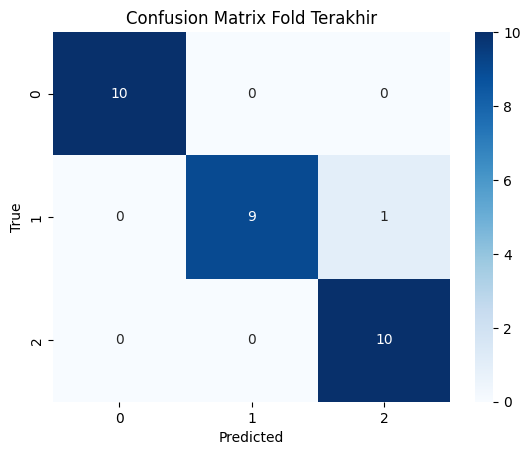

Laporan Klasifikasi:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Fold Terakhir')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Laporan Klasifikasi:")
print(classification_report(true_classes, predicted_classes, target_names=iris.target_names))


#**NN Untuk Prediksi nilai/ Regresi**

**The Boston Housing Dataset**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

•	CRIM - per capita crime rate by town

•	ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

•	INDUS - proportion of non-retail business acres per town.

•	CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

•	NOX - nitric oxides concentration (parts per 10 million)

•	RM - average number of rooms per dwelling

•	AGE - proportion of owner-occupied units built prior to 1940

•	DIS - weighted distances to five Boston employment centres

•	RAD - index of accessibility to radial highways

•	TAX - full-value property-tax rate per $10,000

•	PTRATIO - pupil-teacher ratio by town

•	B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

•	LSTAT - % lower status of the population

•	MEDV - Median value of owner-occupied homes in $1000's

##NN untuk Prediksi harga rumah menggunakan Hold Out Validation


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

**Memuat dan Memproses Dataset Boston Housing dari kaggle**

Dataset ini memiliki 506 sampel dengan 13 fitur. Target yang akan diprediksi adalah harga rumah.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikrishnan/boston-house-prices")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vikrishnan/boston-house-prices/versions/1


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('/root/.cache/kagglehub/datasets/vikrishnan/boston-house-prices/versions/1/housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
# Melihat 5 baris pertama dataset
print(data.head())

# Memisahkan fitur (X) dan target (y)
X = data.drop('MEDV', axis=1)  # Semua kolom kecuali kolom 'MEDV'
y = data['MEDV']  # Kolom 'MEDV' sebagai target

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
# Normalisasi fitur agar lebih mudah dikonvergensi
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

**Membagi Dataset Menjadi Training dan Testing Set**

Pada metode Hold-Out Validation, kita akan membagi dataset menjadi 80% data training dan 20% data testing.

In [ ]:
# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")


Jumlah data training: 404
Jumlah data testing: 102


**Membangun Model Neural Network**

Kita akan membuat model Neural Network sederhana dengan 3 hidden layers dan 1 neuron pada output layer (aktivasi linear) karena ini adalah masalah regresi.

In [ ]:


 v. def build_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))  # 1 output untuk regresi
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# Membangun dan mengompilasi model
model = build_model(X_train.shape[1])
model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

**Melatih Model**

Kita akan melatih model menggunakan data training selama 50 epoch dengan batch size 8.

In [ ]:
# Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 597.9979 - mse: 597.9979 - val_loss: 497.4241 - val_mse: 497.4241
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 512.5795 - mse: 512.5795 - val_loss: 224.9804 - val_mse: 224.9804
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 189.5181 - mse: 189.5181 - val_loss: 88.1630 - val_mse: 88.1630
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 118.0162 - mse: 118.0162 - val_loss: 67.1038 - val_mse: 67.1038
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 97.5319 - mse: 97.5319 - val_loss: 54.0893 - val_mse: 54.0893
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.5924 - mse: 70.5924 - val_loss: 46.7704 - val_mse: 46.7704
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.8095 - mse: 62.8095 - val_loss: 43.2055 - val_mse: 43.2055
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50.3771 - mse: 50.3771 - val_loss: 41.3365 - val_mse: 41.3365
Epoch 9/50
41/41 ━━━━━━━━━━

**Evaluasi Model**

Setelah model dilatih, kita akan mengevaluasi performa model pada data testing.

In [ ]:
# Evaluasi model pada data testing
predictions = model.predict(X_test).flatten()

# Menghitung MSE dan R-squared
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"\nMean Squared Error (MSE) pada data testing: {mse:.2f}")
print(f"R-squared (R²) pada data testing: {r2:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Mean Squared Error (MSE) pada data testing: 17.12
R-squared (R²) pada data testing: 0.77


**Visualisasi Hasil Pelatihan**

Untuk melihat seberapa baik model kita, kita dapat memvisualisasikan loss (MSE) pada data training dan validasi selama pelatihan.

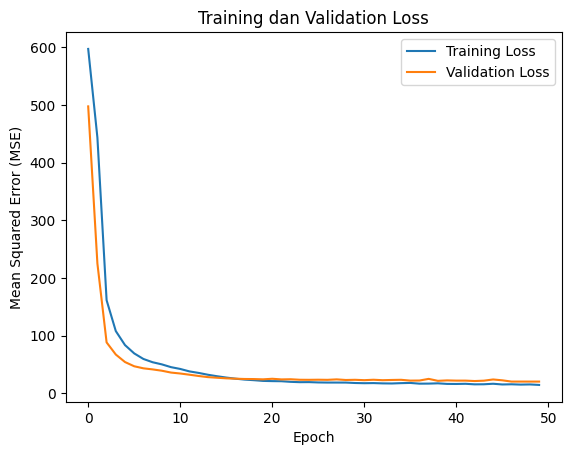

In [ ]:
# Visualisasi loss selama pelatihan
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training dan Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()


**Visualisasi Prediksi vs Nilai Aktual**

Kita bisa membuat scatter plot untuk membandingkan nilai aktual dengan prediksi pada data testing.

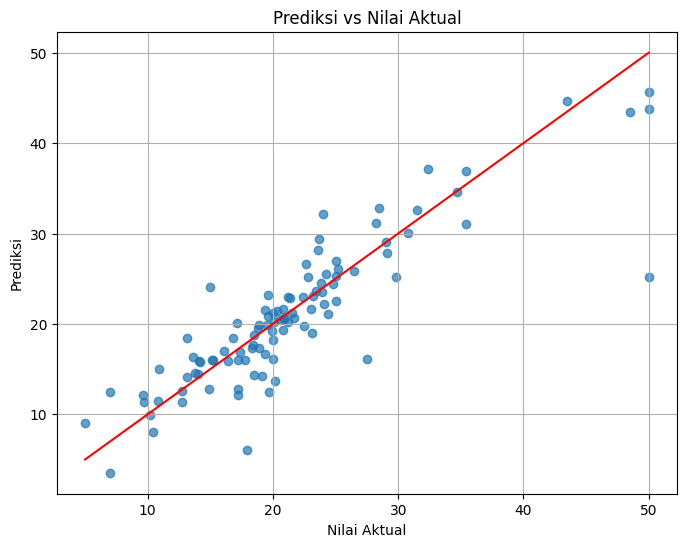

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.title('Prediksi vs Nilai Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


**Analisis Hasil dengan Histogram untuk melihat distribusi Error**

Kita juga dapat melihat distribusi error (selisih antara prediksi dan nilai asli) menggunakan histogram.

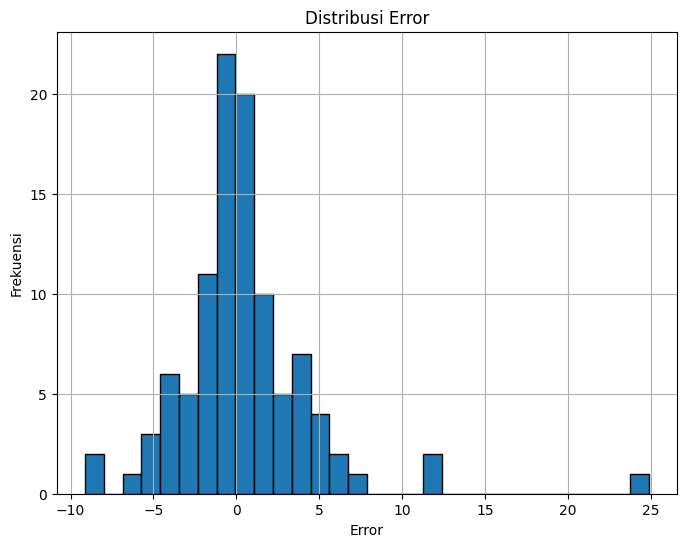

In [ ]:
errors = y_test - predictions
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.title('Distribusi Error')
plt.xlabel('Error')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()


In [ ]:
pip install pandas openpyxl

In [ ]:
# Membuat dictionary untuk menyimpan bobot dan bias dari setiap layer
weights_data = {}

for layer_idx, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()  # Ekstrak bobot dan bias
    weights_data[f'Layer_{layer_idx + 1}_weights'] = weights.flatten()  # Flatten agar 1D
    weights_data[f'Layer_{layer_idx + 1}_biases'] = biases

# Konversi dictionary menjadi DataFrame
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in weights_data.items()]))

# Menyimpan DataFrame ke file Excel
df.to_excel('model_weights1.xlsx', index=False)
print("Bobot dan bias berhasil disimpan di file 'model_weights1.xlsx'")

Bobot dan bias berhasil disimpan di file 'model_weights1.xlsx'


##NN untuk Prediksi harga rumah menggunakan K-fold Validation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns


**Membuat Fungsi untuk Membangun Model Neural Network**

Kita akan membuat fungsi untuk membangun model Neural Network. Karena ini adalah masalah regresi, layer terakhir akan memiliki 1 neuron dengan aktivasi linear.

In [ ]:
def build_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))  # 1 output untuk regresi
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model


**Implementasi K-Fold Cross-Validation**

Kita akan menggunakan K-Fold Cross-Validation untuk mengevaluasi performa model dengan membagi dataset menjadi beberapa 5 bagian fold.

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []
fold_no = 1

for train_index, test_index in kfold.split(X_scaled):
    print(f"\nFold {fold_no}")

    # Membagi data menjadi training dan testing set berdasarkan indeks
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Membangun dan melatih model
    model = build_model(input_shape=X_train.shape[1])
    history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

    # Evaluasi model pada data testing
    predictions = model.predict(X_test).flatten()

    # Menghitung MSE dan R-squared
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mse_scores.append(mse)
    r2_scores.append(r2)

    # Menampilkan hasil fold
    print(f"MSE pada fold {fold_no}: {mse:.2f}")
    print(f"R-squared pada fold {fold_no}: {r2:.2f}")

    fold_no += 1

# Menampilkan hasil akhir cross-validation
print("\nHasil Cross-Validation:")
print(f"MSE rata-rata: {np.mean(mse_scores):.2f}")
print(f"R-squared rata-rata: {np.mean(r2_scores):.2f}")



Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MSE pada fold 1: 14.33
R-squared pada fold 1: 0.80

Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MSE pada fold 2: 10.73
R-squared pada fold 2: 0.86

Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MSE pada fold 3: 21.74
R-squared pada fold 3: 0.76

Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MSE pada fold 4: 12.97
R-squared pada fold 4: 0.88

Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MSE pada fold 5: 16.34
R-squared pada fold 5: 0.77

Hasil Cross-Validation:
MSE rata-rata: 15.23
R-squared rata-rata: 0.82


**Visualisasi Hasil Pelatihan**

Jika ingin melihat hasil pelatihan (loss) pada salah satu fold, kita bisa menambahkan visualisasi berikut:

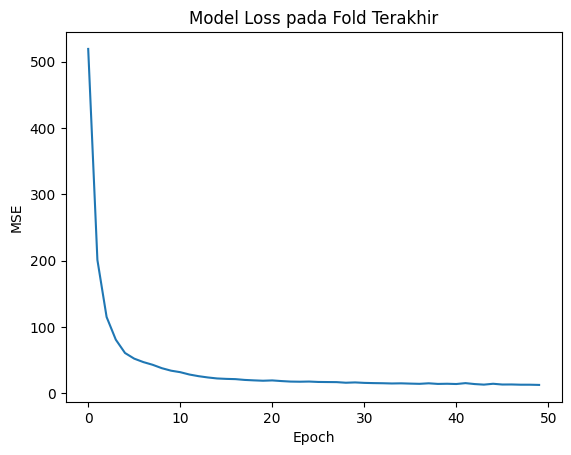

In [ ]:
# Visualisasi loss pada fold terakhir
plt.plot(history.history['loss'])
plt.title('Model Loss pada Fold Terakhir')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()


**Analisis Hasil dengan Scatter Plot**

Untuk melihat seberapa baik model memprediksi harga rumah, kita bisa menggunakan scatter plot antara nilai aktual dan prediksi pada fold terakhir.

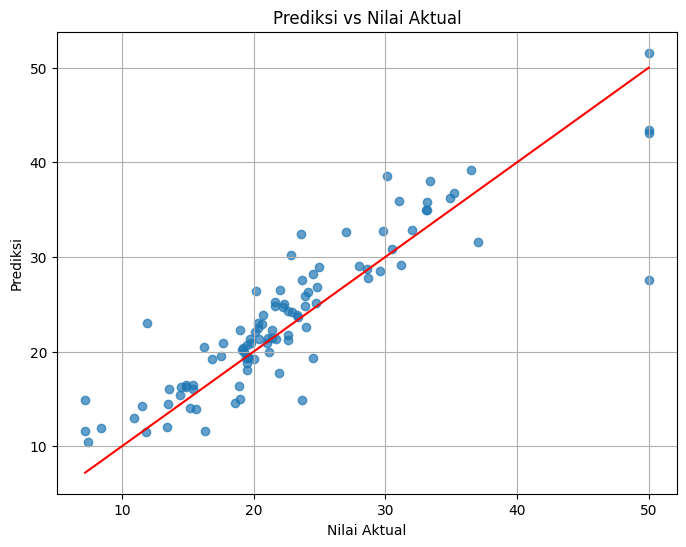

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.title('Prediksi vs Nilai Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


**Analisis Hasil dengan Histogram untuk melihat distribusi Error**

Kita juga dapat melihat distribusi error (selisih antara prediksi dan nilai asli) menggunakan histogram.

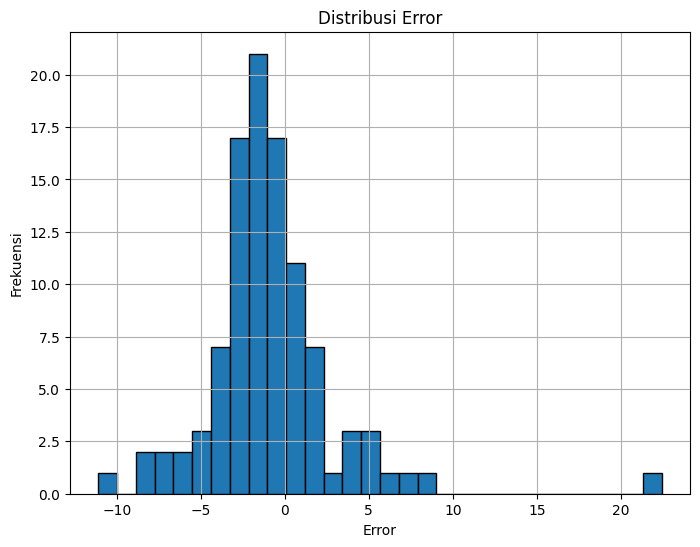

In [ ]:
errors = y_test - predictions
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.title('Distribusi Error')
plt.xlabel('Error')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [ ]:
pip install pandas openpyxl


In [ ]:
# Membuat dictionary untuk menyimpan bobot dan bias dari setiap layer
weights_data = {}

for layer_idx, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()  # Ekstrak bobot dan bias
    weights_data[f'Layer_{layer_idx + 1}_weights'] = weights.flatten()  # Flatten agar 1D
    weights_data[f'Layer_{layer_idx + 1}_biases'] = biases

# Konversi dictionary menjadi DataFrame
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in weights_data.items()]))

# Menyimpan DataFrame ke file Excel
df.to_excel('model_weights.xlsx', index=False)
print("Bobot dan bias berhasil disimpan di file 'model_weights.xlsx'")


Bobot dan bias berhasil disimpan di file 'model_weights.xlsx'
